In [8]:
import numpy as np
import pandas as pd
import time
from BF import make_features, make_table, make_features2, make_table2, load_df
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import pickle
import multiprocessing as mp
pd.options.mode.chained_assignment = None
from multiprocessing import Pool, cpu_count

In [2]:
xgb.__version__

'0.6'

In [4]:
cpu_count()

32

# Define "process" func to put to pool

In [ ]:
def correct_date(x):
    try:
        if int(x[:4])<1960:
            return '1960-01-01 00:00:00.0'
        else:
            return x        
    except:
        return '1960-01-01 00:00:00.0'   
    
def process(df): 
    df = df.replace('',np.nan)
    for c in df.columns:
        for dtype in [int, float]:
            try:
                df.loc[:,c] = df[c].astype(dtype)
            except ValueError:
                continue
            except:
                pass
            else:
                pass  
        else:
            pass
    
    for col in other_cols:
        df[col] = df[col].fillna('nan')
    for col in df.select_dtypes(include=['O']).columns:
        if col not in date_cols+other_cols:
            try:
                df[col] = df[col].apply(lambda x: x.encode('utf-8').strip())
            except:
                #print col
                pass
             
    
    
    for col in other_cols:
        df[col] = df[col].fillna('nan')
    for col in df.select_dtypes(include=['O']).columns:
        if col not in date_cols+other_cols:
            try:
                df[col] = df[col].fillna('nan')
                df[col] = df[col].apply(lambda x: x.encode('utf-8').strip())
            except:
                #print col
                pass
            
            
    df['subs_key'] = [str(int(x)) for x in df.subs_key]
    df['ban_key'] = [str(int(x)) for x in df.ban_key]
    df['dealer_code'] = df.dealer_code.astype(str)
    df['int_state_6m'] = df.int_state_6m.astype(str)
    
    df['date'] = pd.to_datetime('2017-05-01', format='%Y-%m-%d') 
    df['app_activation_date'] = df.app_activation_date.apply(lambda x: correct_date(str(x)))
    df['subs_activation_date_key'] = df.subs_activation_date_key.apply(lambda x: correct_date(str(x)))
    df['date_suspend'] = df.date_suspend.apply(lambda x: correct_date(str(x)))
    df['change_pp_date'] = df.change_pp_date.apply(lambda x: correct_date(str(x)))
    
    df['app_activation_date'] = pd.to_datetime(df.app_activation_date, format='%Y%m%d', errors='coerce')
    df['subs_activation_date_key'] = pd.to_datetime(df.subs_activation_date_key, format='%Y-%m-%d ', errors='coerce')
    df['date_suspend'] = pd.to_datetime(df.date_suspend, format='%Y-%m-%d ', errors='coerce')
    df['change_pp_date'] = pd.to_datetime(df.change_pp_date, format='%Y-%m-%d ', errors='coerce')
    df.max_period_days_6m = df.max_period_days_6m.fillna('nan')
    df.avg_balance_6m = df.avg_balance_6m.fillna('nan')
    df.customer_birth_date = df.customer_birth_date.fillna('nan')
    df.customer_birth_date = df.customer_birth_date.astype(str)    
    
    data = make_features(df, tbl)
    data2 = make_features2(df, tbl2)
    est = bst.predict(xgb.DMatrix(data))
    est2 = bst2.predict(xgb.DMatrix(data2))
    est_rf = bst_rf.predict(xgb.DMatrix(data))
        
    return (est + est_rf + 0.45*est2) / (1+1+0.45)

In [6]:
%%time
fdir=''
bst = xgb.Booster({'nthread':1})
bst2 = xgb.Booster({'nthread':1})
bst_rf = xgb.Booster({'nthread':1})

bst.load_model(fdir+'rBF_model.xgb')
bst2.load_model(fdir+'rBF_model2.xgb')
bst_rf.load_model(fdir+'rBF_model_rf.xgb')
tbl = pickle.load(open(fdir+'rBF_tbl.pic'))
tbl2 = pickle.load(open(fdir+'rBF_tbl2.pic'))

date_cols = ['app_activation_date','subs_activation_date_key','date_suspend','change_pp_date']
other_cols = ['customer_birth_date', 'avg_balance_6m', 'max_period_days_6m']

CPU times: user 76.4 ms, sys: 224 ms, total: 300 ms
Wall time: 301 ms


In [7]:
col_names = ['subs_key', 'ban_key', 'market_key', 'account_type_key', 'dw_status_key', 'segment_key', 'cnt_ban_subs_1m', 'life_time', 'super_region_name', 'curr_subs_status_key', 'dealer_code', 'dealer_group_desc', 'class_device', 'type_device', 'arpu_total_m', 'arpu_total_avg_hy', 'arpu_int_roaming_m', 'arpu_onnet_roaming_m', 'arpu_voice_m', 'arpu_gprs_m', 'arpu_vas_m', 'arpu_wo_roam_m', 'arpu_mms_m', 'arpu_sms_m', 'cnt_voice_out_1m', 'voice_out_duration_1m', 'cnt_voice_in_1m', 'unic_ctn_cpa_1m', 'equipment_type_6m', 'equipment_type_1m', 'payment_method_1m', 'int_state_6m', 'cnt_roam_state_6m', 'charge_package_avg_6m', 'arpu_total_13m', 'app_activation_date', 'call_share_vip_6m', 'call_share_vip_1m', 'cnt_voice_to_sng_avg_6m', 'cnt_voice_to_wosng_avg_6m', 'cnt_call_to_region_1m', 'cnt_call_to_region_avg_6m', 'cnt_call_out_1m', 'cnt_call_out_avg_6m', 'subs_work_ind', 'sms_comp_num_avg_hy', 'avg_balance_6m', 'max_period_days_6m', 'change_pp_date', 'subs_activation_date_key', 'voice_in_duration_1m', 'date_suspend', 'first_ban', 'price_plan_key_eop', 'pp_group_eop', 'price_plan_desc_act', 'cust_fullname', 'first_ctn', 'customer_birth_date', 'month']

 # Main cycle multiprocessing by chunksize

In [9]:
chunksize = 250000 
NPROC=30
t0 = time.time()
FILENAME = 'fs_to_score07_corr.csv'
xdir='~/'
II=1
for big_df in pd.read_csv(xdir+FILENAME,  na_filter=False, delimiter=',', \
                          chunksize=chunksize, header=None, names=col_names):
    try: 
        if II<0: 
            n+=len(big_df)
            print II, n, round((time.time()-t0)/60.,3)
            II+=1
            continue
        else:
            pass    
        
        p = mp.Pool(processes=NPROC)
        split_dfs = np.array_split(big_df,NPROC)
        for i in range(NPROC):
            split_dfs[i] = split_dfs[i].reset_index(drop=True)
            
        pool_results = p.map(process, split_dfs)
        p.close()
        p.join()
        
        scores = np.hstack(pool_results)
        big_df['score'] = scores
        if II==1:
            res = big_df[['subs_key', 'score']].copy()
        else:
            res = pd.concat((res, big_df[['subs_key', 'score']]))
        II+=1
        print II, len(res), round((time.time()-t0)/60.,3)
    except:
        print II, 'some error', len(res)
        big_df.to_csv(fdir+str(II)+'_error_data.csv', index=False)
        II+=1
        pass   

/opt/users/atselikov/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2 250000 1.549
3 500000 3.101
4 750000 4.561
5 1000000 5.938
6 1250000 7.406
7 1500000 8.773
8 1750000 10.24
9 2000000 11.64
10 2250000 13.052
11 2500000 14.524
12 2750000 15.96
13 3000000 17.39
14 3250000 18.815
15 3500000 20.195
16 3750000 21.649
17 4000000 23.137
18 4250000 24.603
19 4500000 26.01
20 4750000 27.486
21 5000000 28.872
22 5250000 30.293
23 5500000 31.793
24 5750000 33.314
25 6000000 34.716
26 6250000 36.133
27 6500000 37.503
28 6750000 38.884
29 7000000 40.316
30 7250000 41.708
31 7500000 43.166
32 7750000 44.739
33 8000000 46.213
34 8250000 47.661
35 8500000 49.043
36 8750000 50.422
37 9000000 51.849
37 some error 9000000
39 9250000 54.55
40 9500000 55.994
41 9750000 57.473
42 10000000 58.983
43 10250000 60.376
44 10500000 61.956
45 10750000 63.389
46 11000000 64.835
47 11250000 66.398
48 11500000 67.848
49 11750000 69.293
49 some error 11750000
51 12000000 72.162
52 12250000 73.785
53 12500000 75.269
54 12750000 76.73
55 13000000 78.177
56 13250000 79.62
57 13500000 

In [10]:
np.shape(res)

(49286107, 2)

In [11]:
res.to_csv(fdir+'fr_07.csv', index=False)

CPU times: user 1.05 s, sys: 295 ms, total: 1.35 s
Wall time: 1.33 s


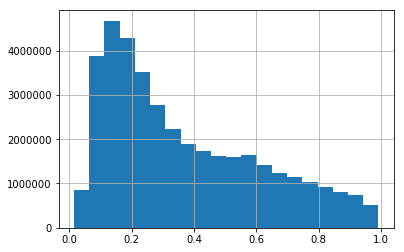

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  
res.score.hist(bins=20)